# Recommender Systems Learning

Example from the learning.
User similarity is at the heart of collaborative filtering. In order to make good recommendations, we need to know how alike two users are. The way to do this is by comparing how similar their ratings for the same product have been.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [5]:
ratings = pd.read_csv('../data/movie_ratings.csv').set_index('Movie')

In [6]:
ratings.head()

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Aquaman,4,1,2,2,2
Avengers: Infinity War,2,5,2,5,5
Black Panther,5,2,5,1,1
Bohemian Rhapsody,2,3,4,4,1
Deadpool 2,3,2,4,5,1


If we wanted to take a look at their user ratings across the preference space of two movies, we could define a function that accepts two movie titles and scatter plots the user ratings as follows.

In [7]:
def ratings_scatter(movie1, movie2):
    x = ratings.T[movie1]
    y = ratings.T[movie2]
    n = list(ratings.T.index)

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=0)
    fig.set_figwidth(12)
    fig.set_figheight(8)
    plt.title("Preference Space for "+ movie1 + " vs. " + movie2, fontsize=20)
    ax.set_xlabel(movie1, fontsize=16)
    ax.set_ylabel(movie2, fontsize=16) 

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), fontsize=12)

Then, we would just need to choose two titles and generate the plot to visualize the preference space for users across those two movies. For example, below is the preference space across the movies Venom and Incredibles 2.

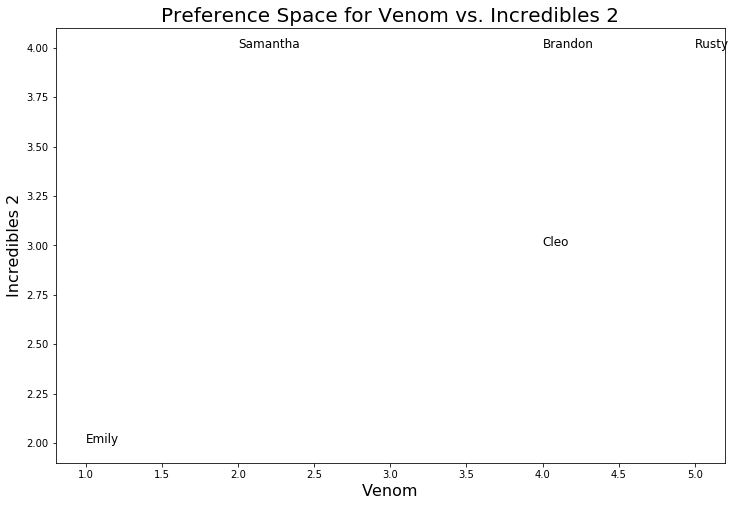

In [8]:
ratings_scatter('Venom', 'Incredibles 2')

We can see that across this preference space, Rusty is more similar to Brandon than he is Emily. However, this can vary across different sets of movies. If we instead scatter plot the ratings for Bohemian Rhapsody and Jurassic World, Rusty is more similar to Emily than to Brandon in this preference space.

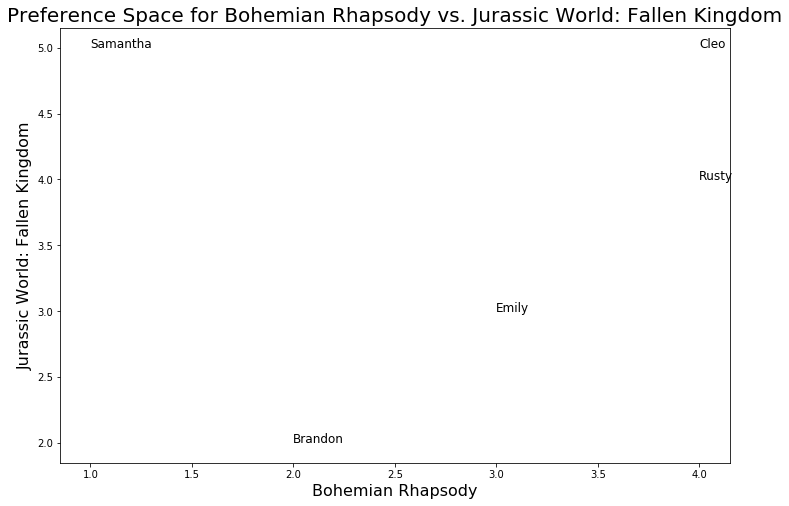

In [14]:
ratings_scatter('Bohemian Rhapsody', 'Jurassic World: Fallen Kingdom')

To get the aggregate distance across all the preference spaces, we can use squareform and pdist from the Scipy library to create a matrix containing the Euclidean distances between all our users.

In [16]:
squareform(pdist(ratings.T, 'euclidean'))

array([[0.        , 6.63324958, 6.        , 7.41619849, 7.48331477],
       [6.63324958, 0.        , 6.92820323, 6.40312424, 5.09901951],
       [6.        , 6.92820323, 0.        , 5.56776436, 8.24621125],
       [7.41619849, 6.40312424, 5.56776436, 0.        , 6.70820393],
       [7.48331477, 5.09901951, 8.24621125, 6.70820393, 0.        ]])

These distances are smaller for users that are more similar, but for our purposes it would be preferable to have a higher score for users that are more similar and a lower score for users that are less similar. We can easily achieve this by adding 1 to the scores and inverting them. Let's also import them into a data frame so that we can more easily view and analyze them.

In [17]:
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'euclidean'))), 
                         index=ratings.columns, columns=ratings.columns)

distances

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


# Generating Recommendations for a User

Suppose that we had a new user named Tom who came to us with the following ratings for each movie.

In [25]:
tom = {'Aquaman': 2,
 'Avengers: Infinity War': 1,
 'Black Panther': 5,
 'Bohemian Rhapsody': 5,
 'Deadpool 2': 2,
 'Fantastic Beasts: The Crimes of Grindelwald': 3,
 'Incredibles 2': 3,
 'Jurassic World: Fallen Kingdom': 4,
 'Mission: Impossible – Fallout': 3,
 'Venom': 3}

We could factor Tom into our similarity matrix and then determine which other users are most similar to him.

In [26]:
ratings['Tom'] = pd.Series(tom)

distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'euclidean'))), 
                         index=ratings.columns, columns=ratings.columns)
display(distances)
display (ratings)
similarities = distances['Tom'].sort_values(ascending=False)[1:]
similarities

,Brandon,Emily,Cleo,Rusty,Samantha,Tom
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878,0.156613
Emily,0.131006,1.000000,0.126132,0.135078,0.163961,0.135078
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152,0.217129
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732,0.126132
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000,0.116961
Tom,0.156613,0.135078,0.217129,0.126132,0.116961,1.000000


,Brandon,Emily,Cleo,Rusty,Samantha,Tom
Movie,,,,,,
Aquaman,4,1,2,2,2,2
Avengers: Infinity War,2,5,2,5,5,1
Black Panther,5,2,5,1,1,5
Bohemian Rhapsody,2,3,4,4,1,5
Deadpool 2,3,2,4,5,1,2
Fantastic Beasts: The Crimes of Grindelwald,5,4,1,2,5,3
Incredibles 2,4,2,3,4,4,3
Jurassic World: Fallen Kingdom,2,3,5,4,5,4
Mission: Impossible – Fallout,5,5,4,3,2,3


Cleo        0.217129
Brandon     0.156613
Emily       0.135078
Rusty       0.126132
Samantha    0.116961
Name: Tom, dtype: float64

It looks like Cleo is the user that is most similar to Tom, followed by Brandon, Emily, Rusty, and then Samantha. These similarity scores should be taken into consideration when recommending movies to Tom that he has not yet seen.

Let's say that everyone but Tom also rated the movies in the movie_ratings2.csv file. Let's import those ratings and then combine them with the similarity scores to generate movie recommendations to Tom.

In [29]:
new_ratings = pd.read_csv('../data/movie_ratings2.csv').set_index('Movie')

Once we have our new_ratings data frame, we are going to copy it to a new recommendations data frame which we will perform our calculations on.

In [30]:
recommendations = new_ratings.copy()

We are going to iterate through each of the other users' similarity scores with Tom and weight their recommendations of these new movies by their similarity score. We are then going to create a new Total column that sums up the total scores for each movie and sort on that so that the movies are in the order that they should be recommended to Tom.

In [31]:
for name, score in dict(similarities).items():
    recommendations[name] = recommendations[name] * score

recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923,2.747544
Wonder Woman,0.626452,0.405234,0.868517,0.378396,0.467845,2.746445
Thor: Ragnarok,0.626452,0.405234,0.868517,0.126132,0.584807,2.611142
Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923,2.585627
Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807,2.520145
Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807,2.484564
Wolf Warrior 2,0.783065,0.405234,0.434259,0.378396,0.467845,2.468799
Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923,2.287458
Star Wars: The Last Jedi,0.783065,0.540312,0.217129,0.252264,0.233923,2.026693


From these results, it looks like Tom should like Despicable Me 3, Wonder Woman, and Thor but perhaps not Star Wars or The Fate of the Furious.

# Using Different Similarity Metrics

Now that we have generated an initial set of recommendations, there is an important topic we would like to circle back and discuss. When we computed our user similarity metrics, we used Euclidean distance as our distance metric. It is important to note that there are a number of other distance metrics in Scipy that we could potentially use to get different results. A full list of all the ones available can be found [here](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html).

To see what the recommendations look like using a different distance metric, all we need to do is swap out the name if the metric in the first line of code below. For example, if we wanted to use cosine distance instead, the results would look like this.

In [32]:
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'cosine'))), 
                         index=ratings.columns, columns=ratings.columns)

similarities = distances['Tom'].sort_values(ascending=False)[1:]

recommendations = new_ratings.copy()

for name, score in dict(similarities).items():
    recommendations[name] = recommendations[name] * score
    
recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Wonder Woman,3.615951,2.511274,3.809728,2.532334,3.168375,15.637662
Despicable Me 3,3.615951,4.185457,4.762161,0.844111,1.584187,14.991867
Thor: Ragnarok,3.615951,2.511274,3.809728,0.844111,3.960468,14.741533
Wolf Warrior 2,4.519939,2.511274,1.904864,2.532334,3.168375,14.636786
Jumanji: Welcome to the Jungle,3.615951,2.511274,2.857296,1.688222,3.960468,14.633212
Guardians of the Galaxy Vol. 2,3.615951,0.837091,4.762161,3.376445,1.584187,14.175835
Spider-Man: Homecoming,0.903988,2.511274,4.762161,1.688222,3.960468,13.826113
Beauty and the Beast,1.807976,4.185457,1.904864,4.220556,1.584187,13.703040
Star Wars: The Last Jedi,4.519939,3.348365,0.952432,1.688222,1.584187,12.093146


We can see that Wonder Woman is now at the top of the list, Guardians of the Galaxy dropped a few places, and Wolf Warrior crept up to the number 4 spot.

If we tried cityblock distance instead, Guardians of the Galaxy shoots up to the number 3 spot and Spider-Man creeps up into the top 5.

In [33]:
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'cityblock'))), 
                         index=ratings.columns, columns=ratings.columns)

similarities = distances['Tom'].sort_values(ascending=False)[1:]

recommendations = new_ratings.copy()

for name, score in dict(similarities).items():
    recommendations[name] = recommendations[name] * score
    
recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Wonder Woman,0.2500,0.166667,0.4,0.176471,0.20,1.193137
Despicable Me 3,0.2500,0.277778,0.5,0.058824,0.10,1.186601
Guardians of the Galaxy Vol. 2,0.2500,0.055556,0.5,0.235294,0.10,1.140850
Thor: Ragnarok,0.2500,0.166667,0.4,0.058824,0.25,1.125490
Spider-Man: Homecoming,0.0625,0.166667,0.5,0.117647,0.25,1.096814
Jumanji: Welcome to the Jungle,0.2500,0.166667,0.3,0.117647,0.25,1.084314
Wolf Warrior 2,0.3125,0.166667,0.2,0.176471,0.20,1.055637
Beauty and the Beast,0.1250,0.277778,0.2,0.294118,0.10,0.996895
Star Wars: The Last Jedi,0.3125,0.222222,0.1,0.117647,0.10,0.852369
